In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [5]:
df=pd.read_csv("data/Mall_Customers.csv")

In [6]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X=df.iloc[:,3:5].values

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

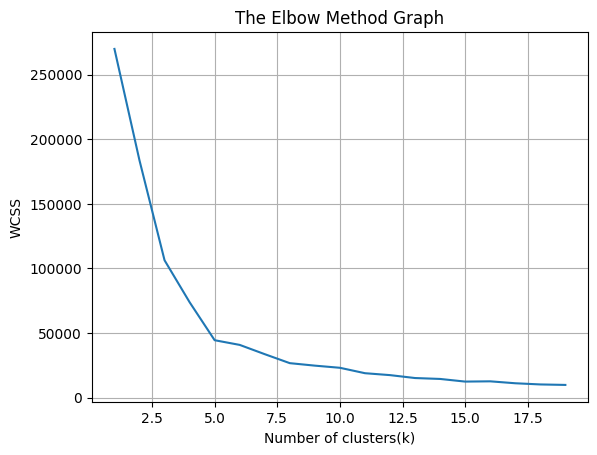

In [9]:
wcss_list= []   
for i in range(1, 20):  
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
    
plt.plot(range(1, 20), wcss_list) 
plt.grid(True)
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('WCSS')  
plt.show()

In [10]:
kmeans = KMeans(n_clusters=6,init='k-means++', random_state= 42)
y_predict=kmeans.fit_predict(X)


In [11]:
y_predict

array([5, 2, 4, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 2, 5, 2,
       4, 2, 4, 2, 5, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 2, 5, 0,
       5, 2, 0, 5, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

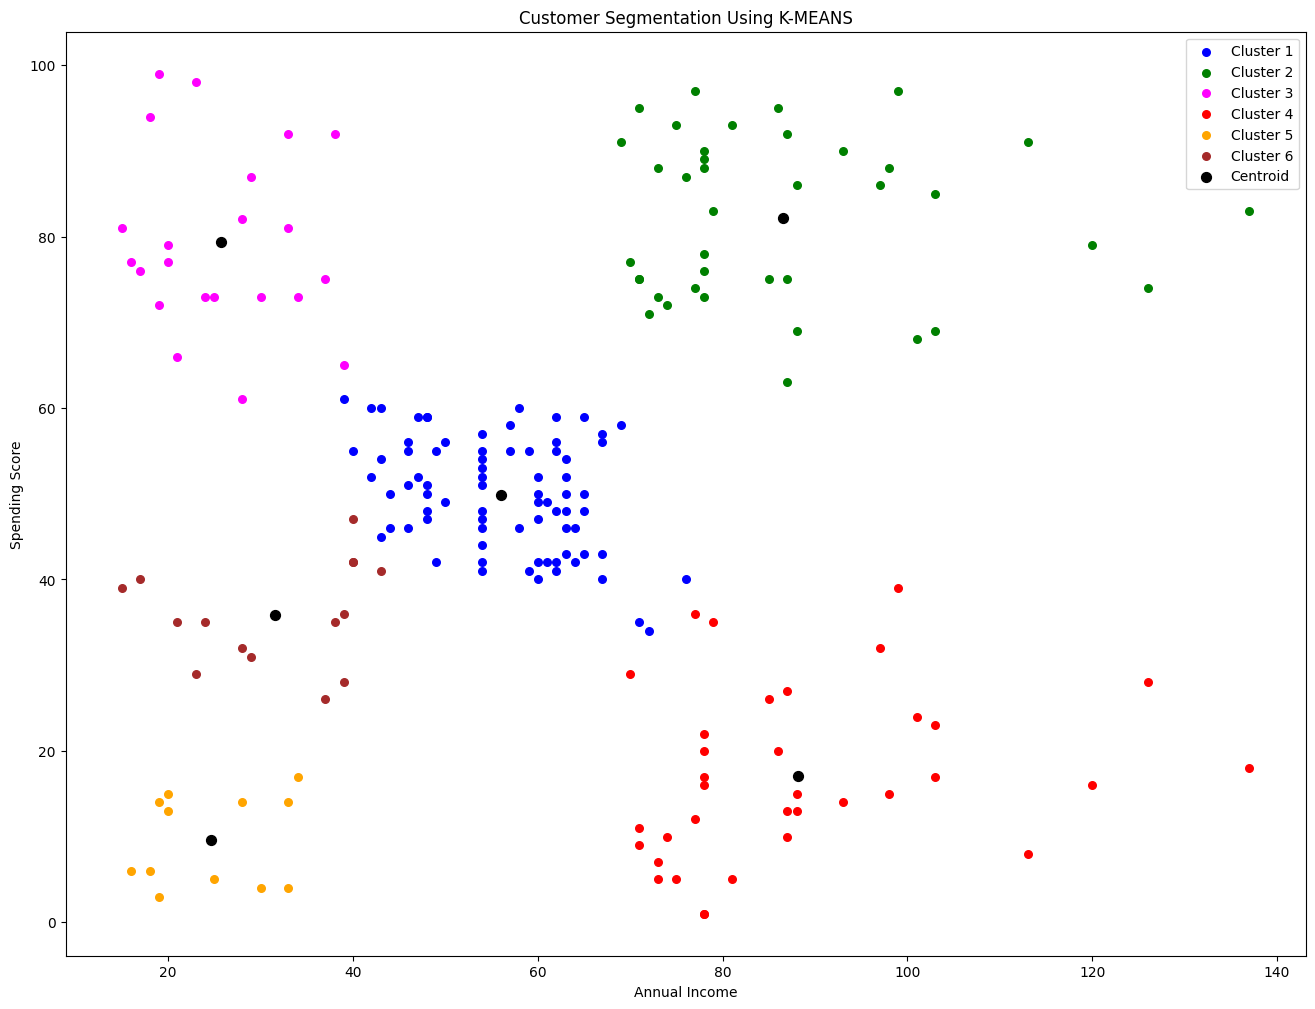

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s=30, c='blue', label='Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s=30, c='green', label='Cluster 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s=30, c='magenta', label='Cluster 3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s=30, c='red', label='Cluster 4')
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s=30, c='orange', label='Cluster 5')
plt.scatter(X[y_predict == 5, 0], X[y_predict == 5, 1], s=30, c='brown', label='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='black', label='Centroid')
plt.title('Customer Segmentation Using K-MEANS')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# Place legend outside the graph
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
plt.savefig('static/customer_segmentation.png', bbox_inches='tight')
plt.show()


In [13]:
import joblib
joblib.dump(kmeans, "Kmeansmodel.joblib")

['Kmeansmodel.joblib']

In [14]:
# Load the trained model from the "model.joblib" file
saved_model = joblib.load("Kmeansmodel.joblib")
saved_model

KMeans(n_clusters=6, random_state=42)

In [15]:
# Test data
test = [[1, 4]]

# Make predictions
predictions = saved_model.predict(np.array(test))

# Print the predictions
print(predictions[0])

4
